In [1]:
import pandas as pd
import numpy as np
import os
HOME = os.path.expanduser('~')


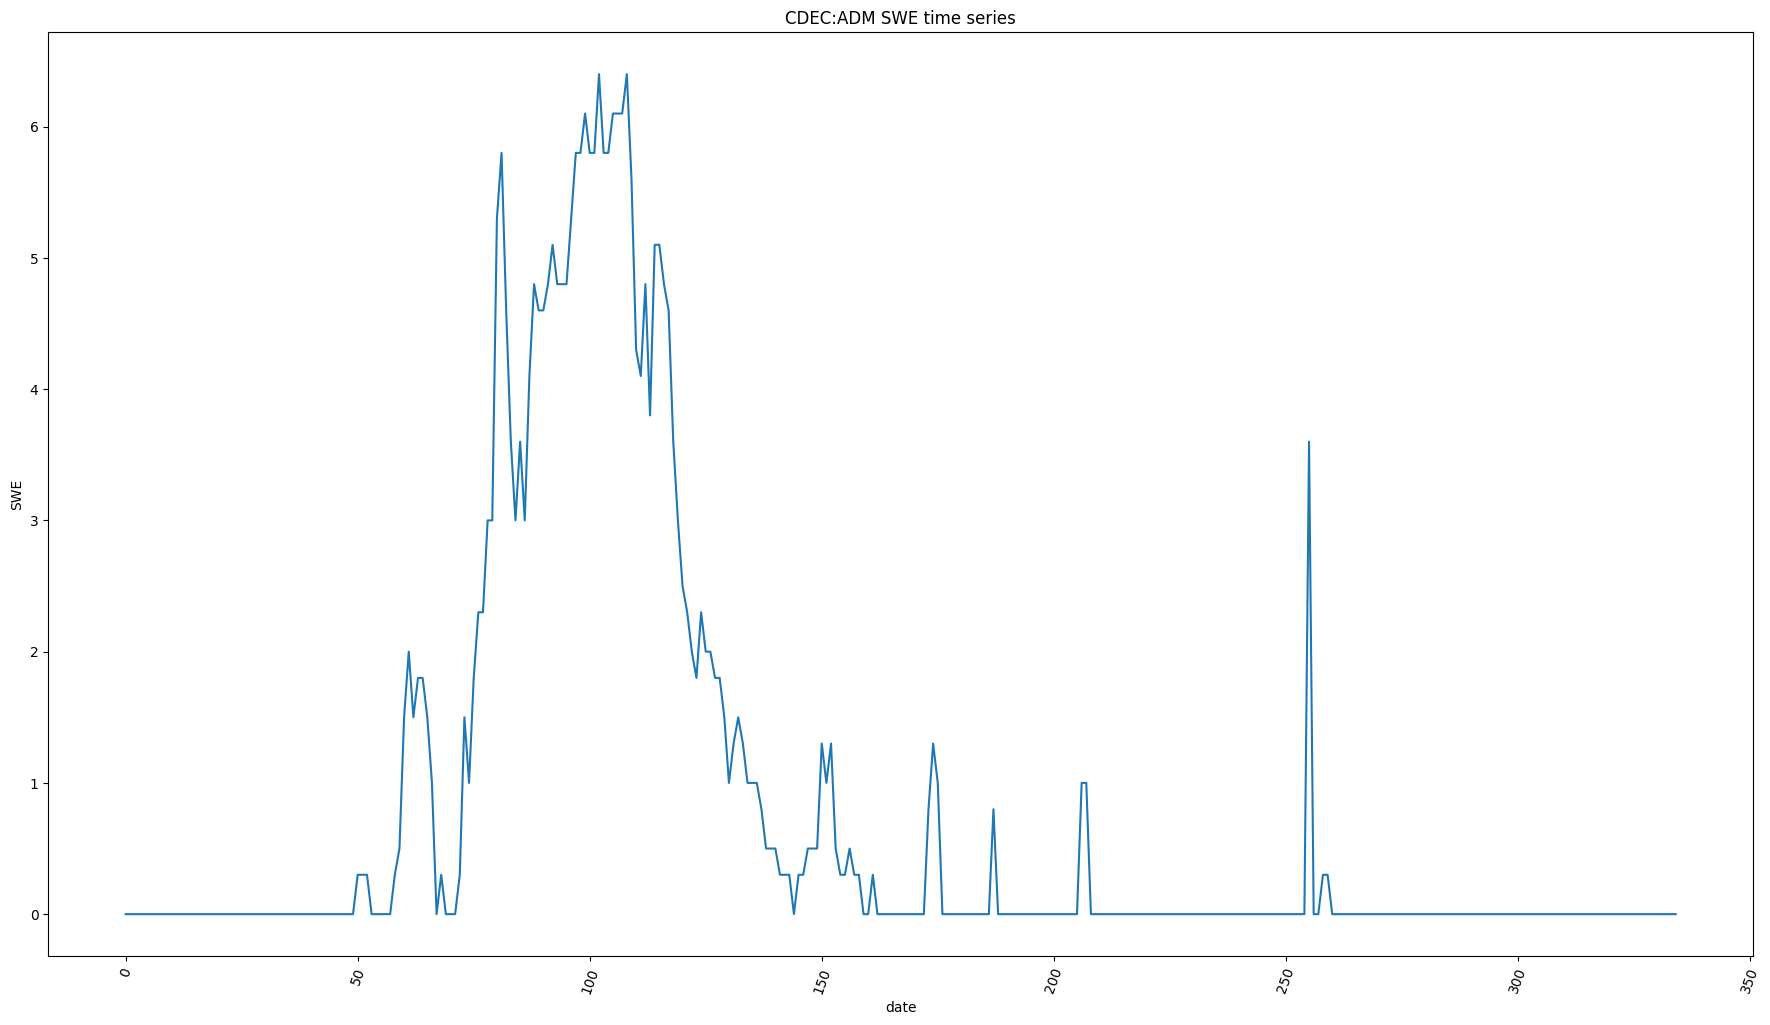

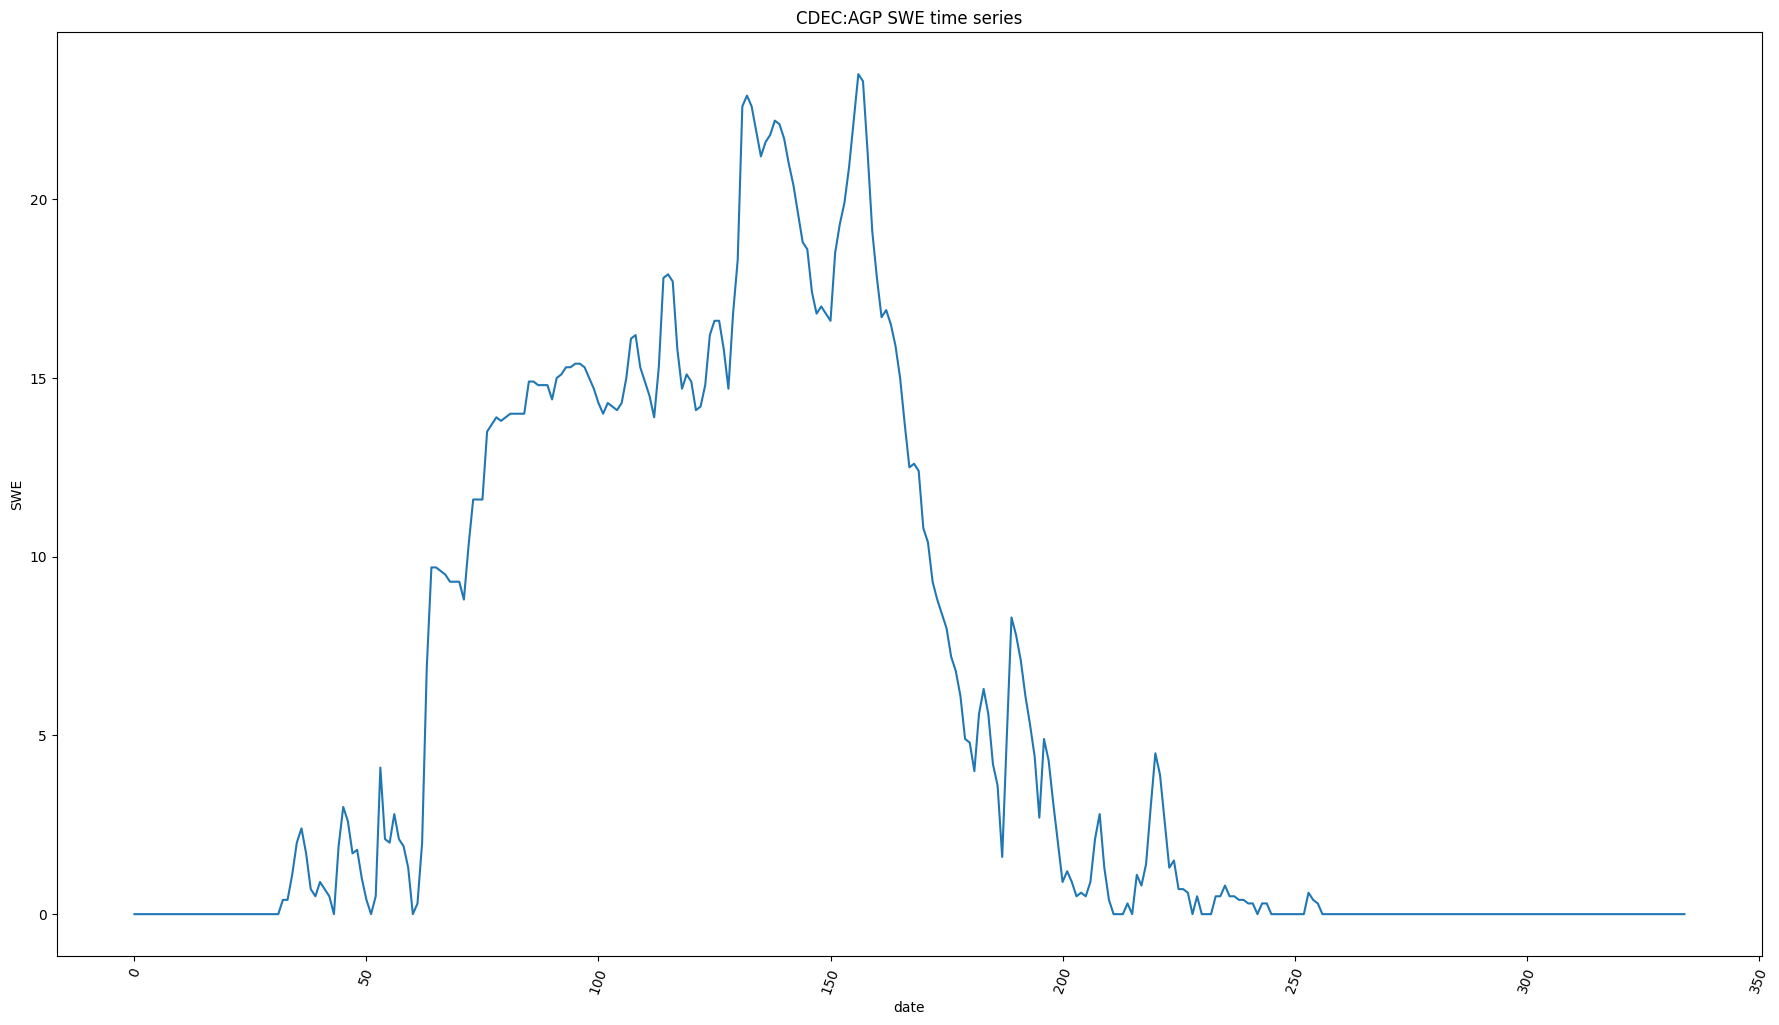

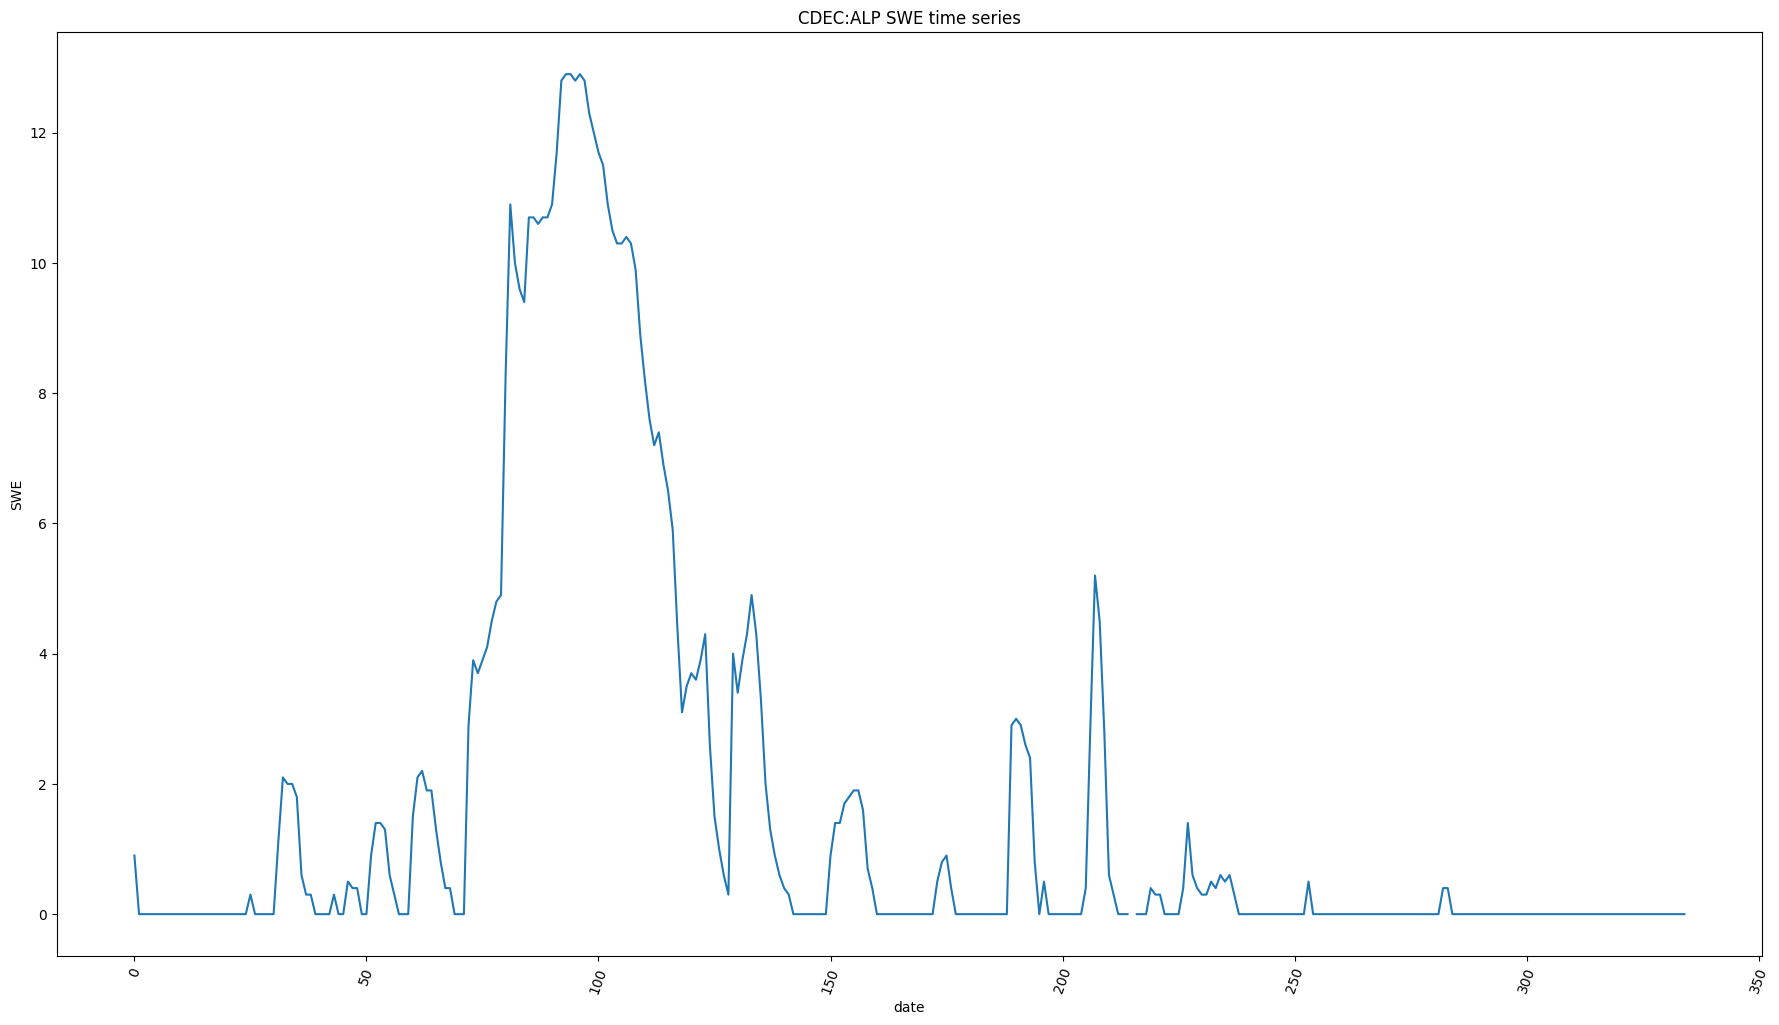

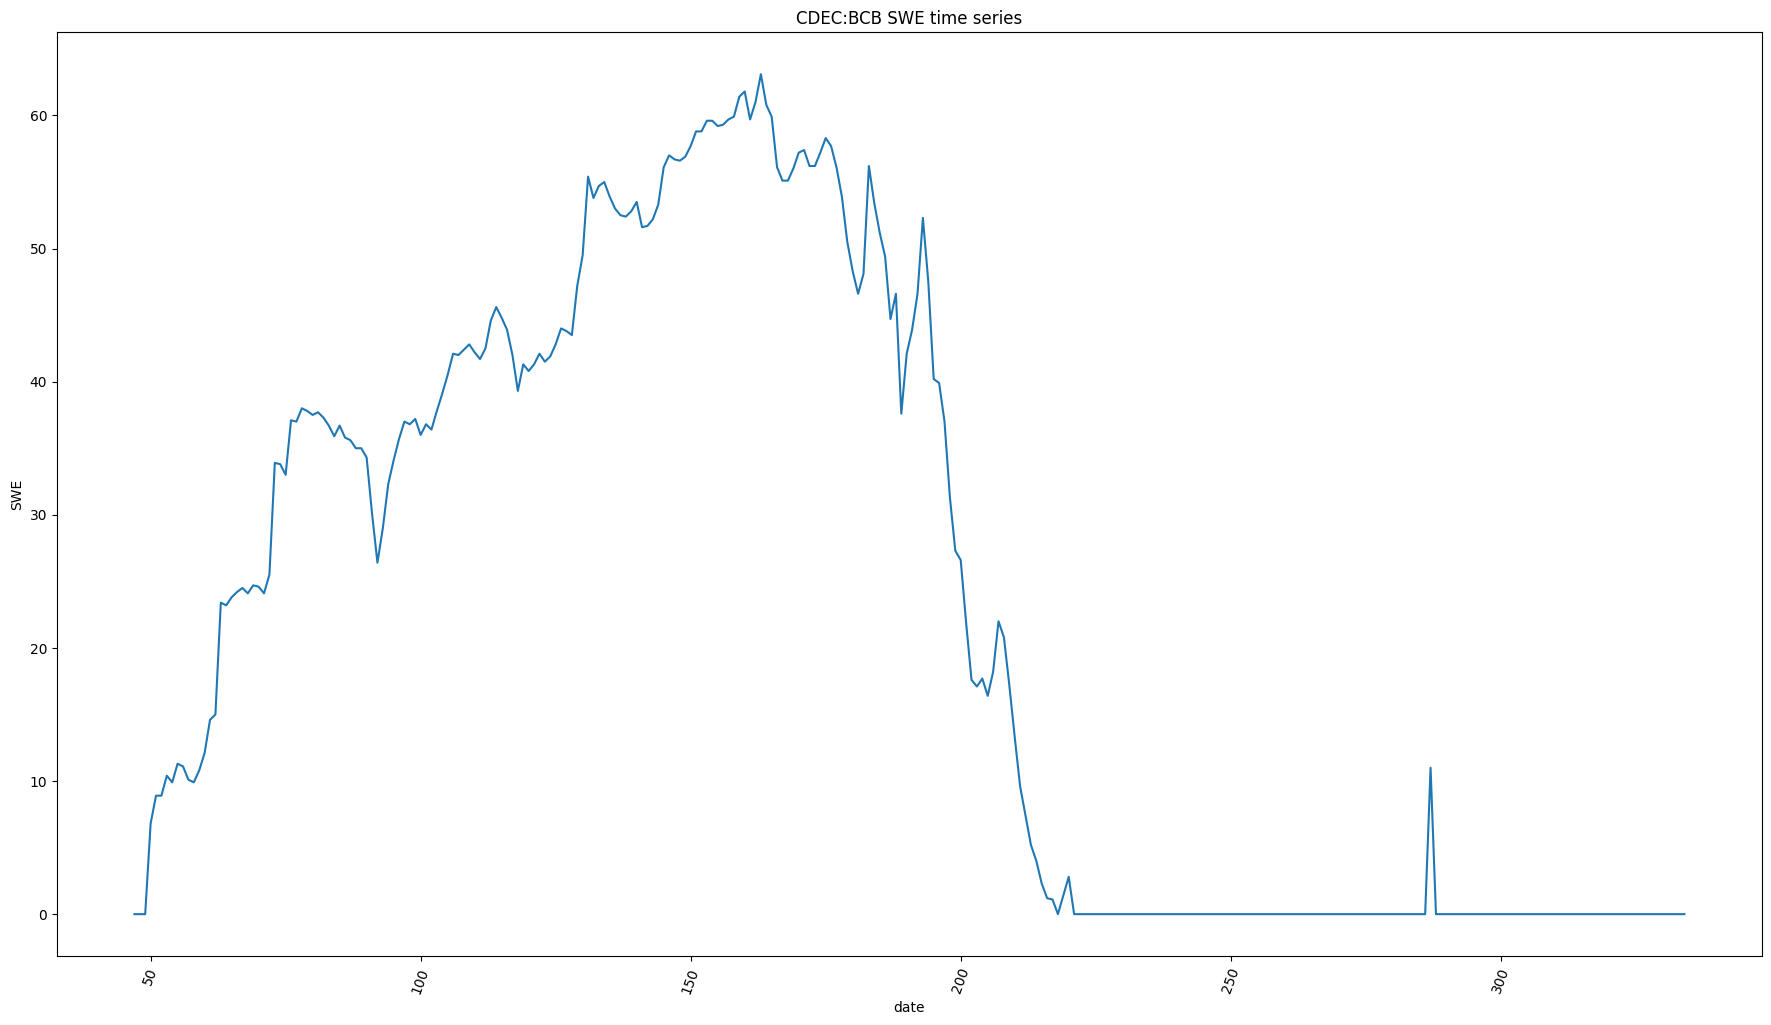

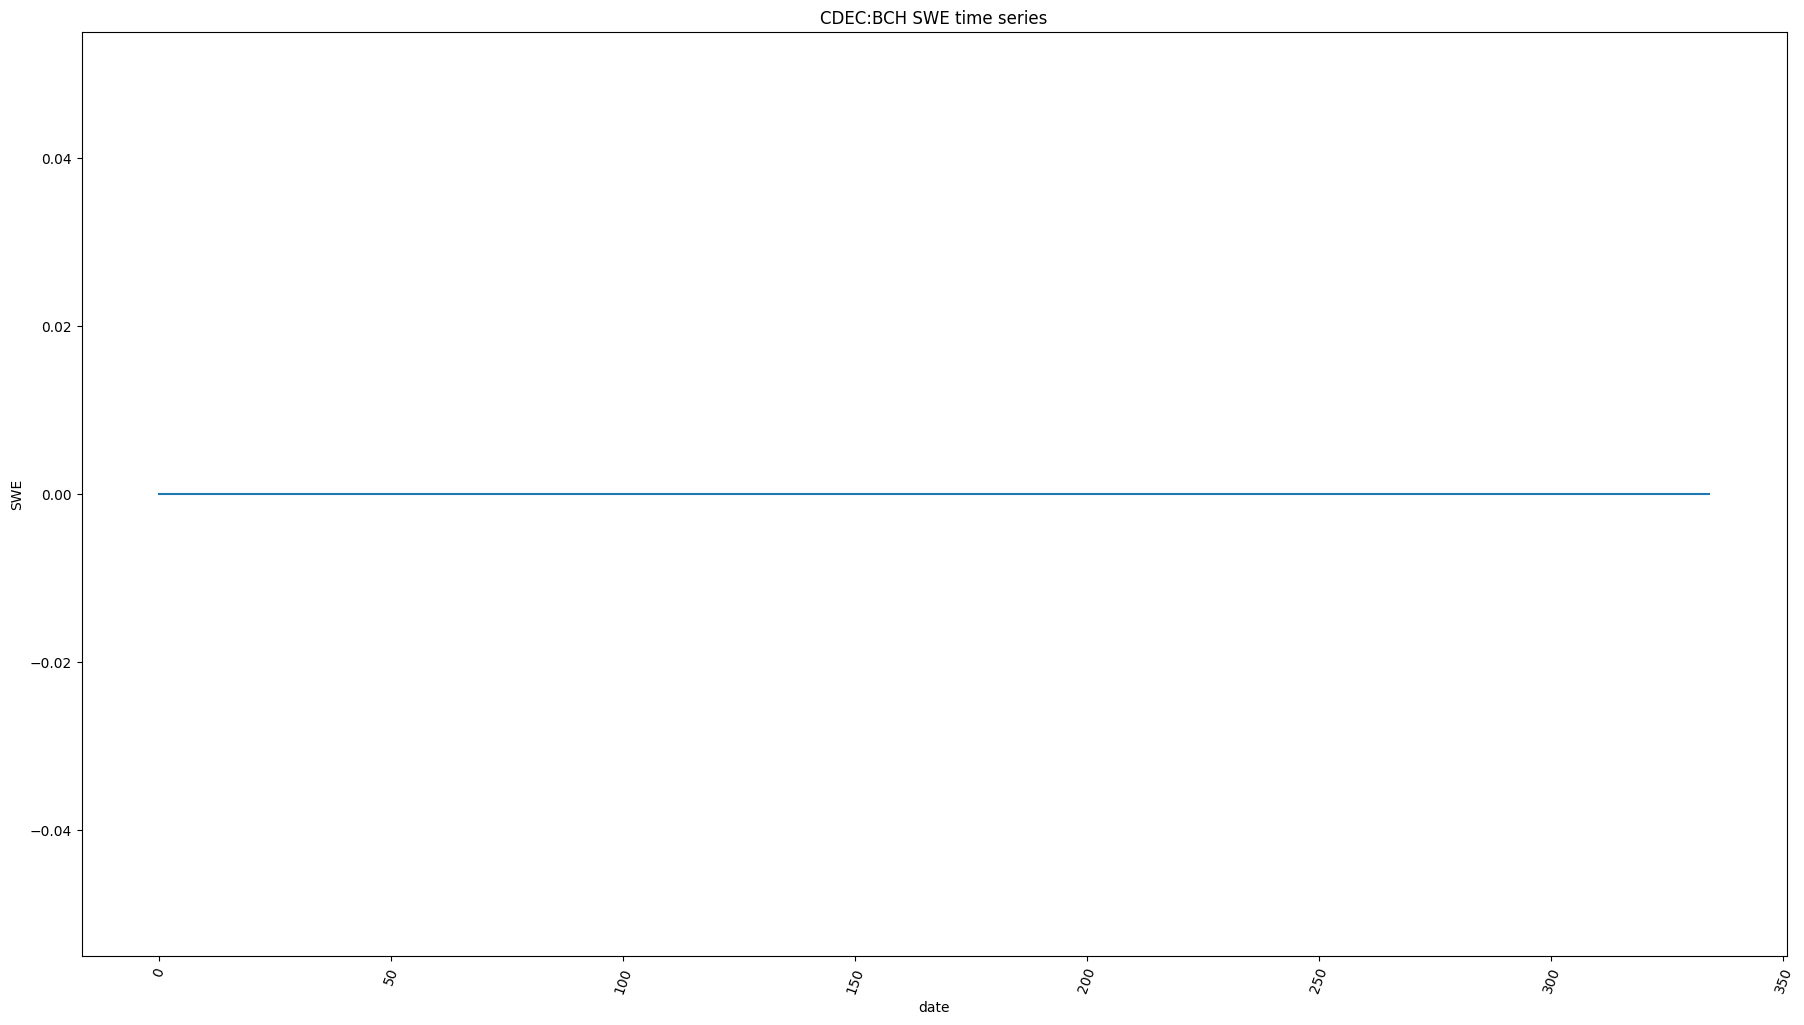

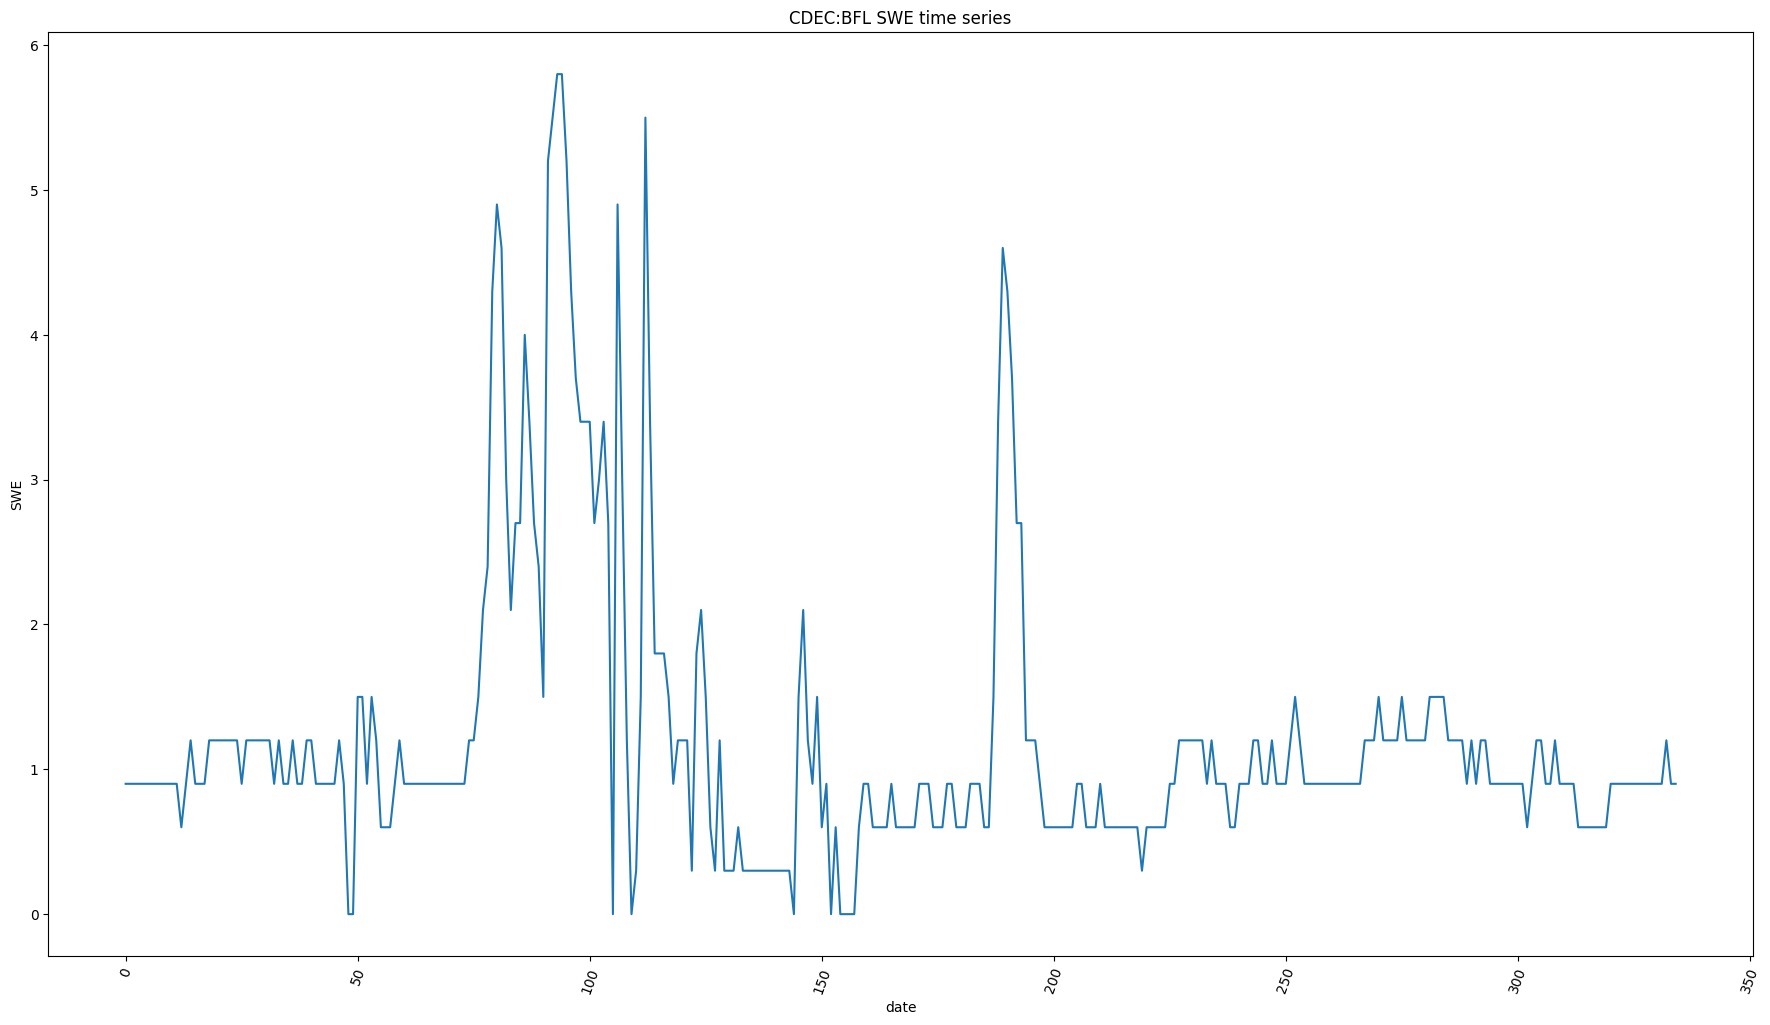

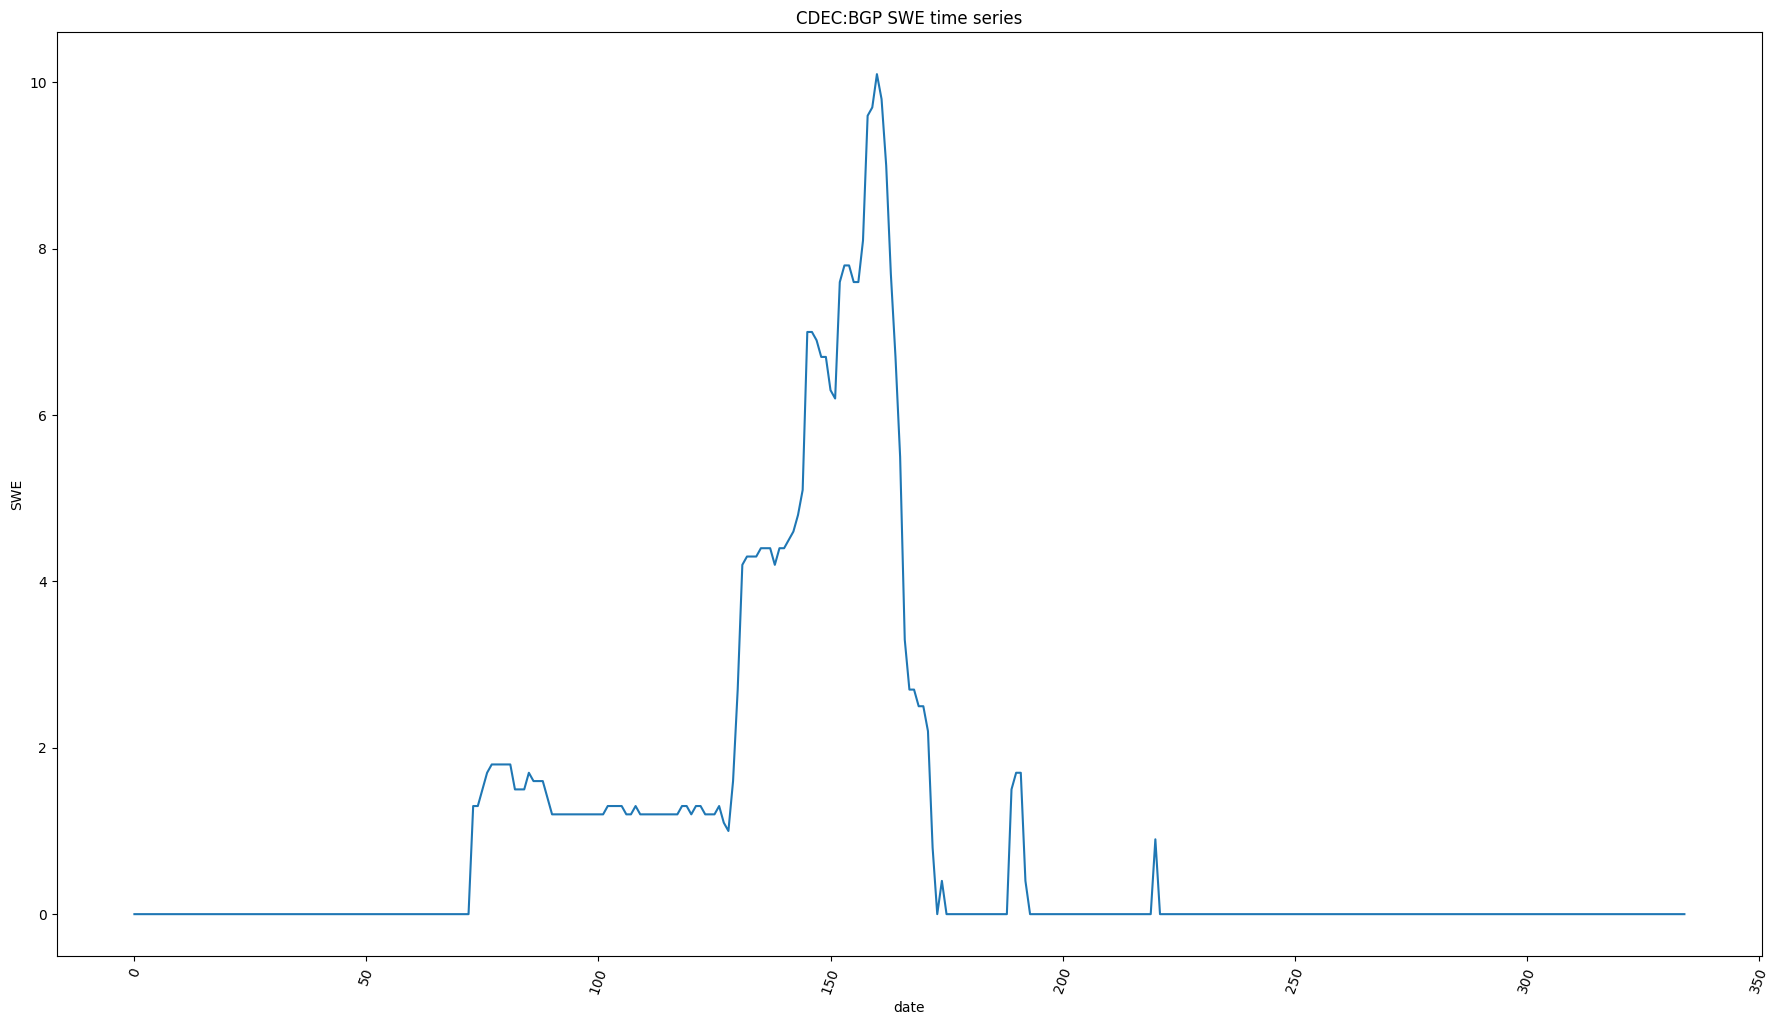

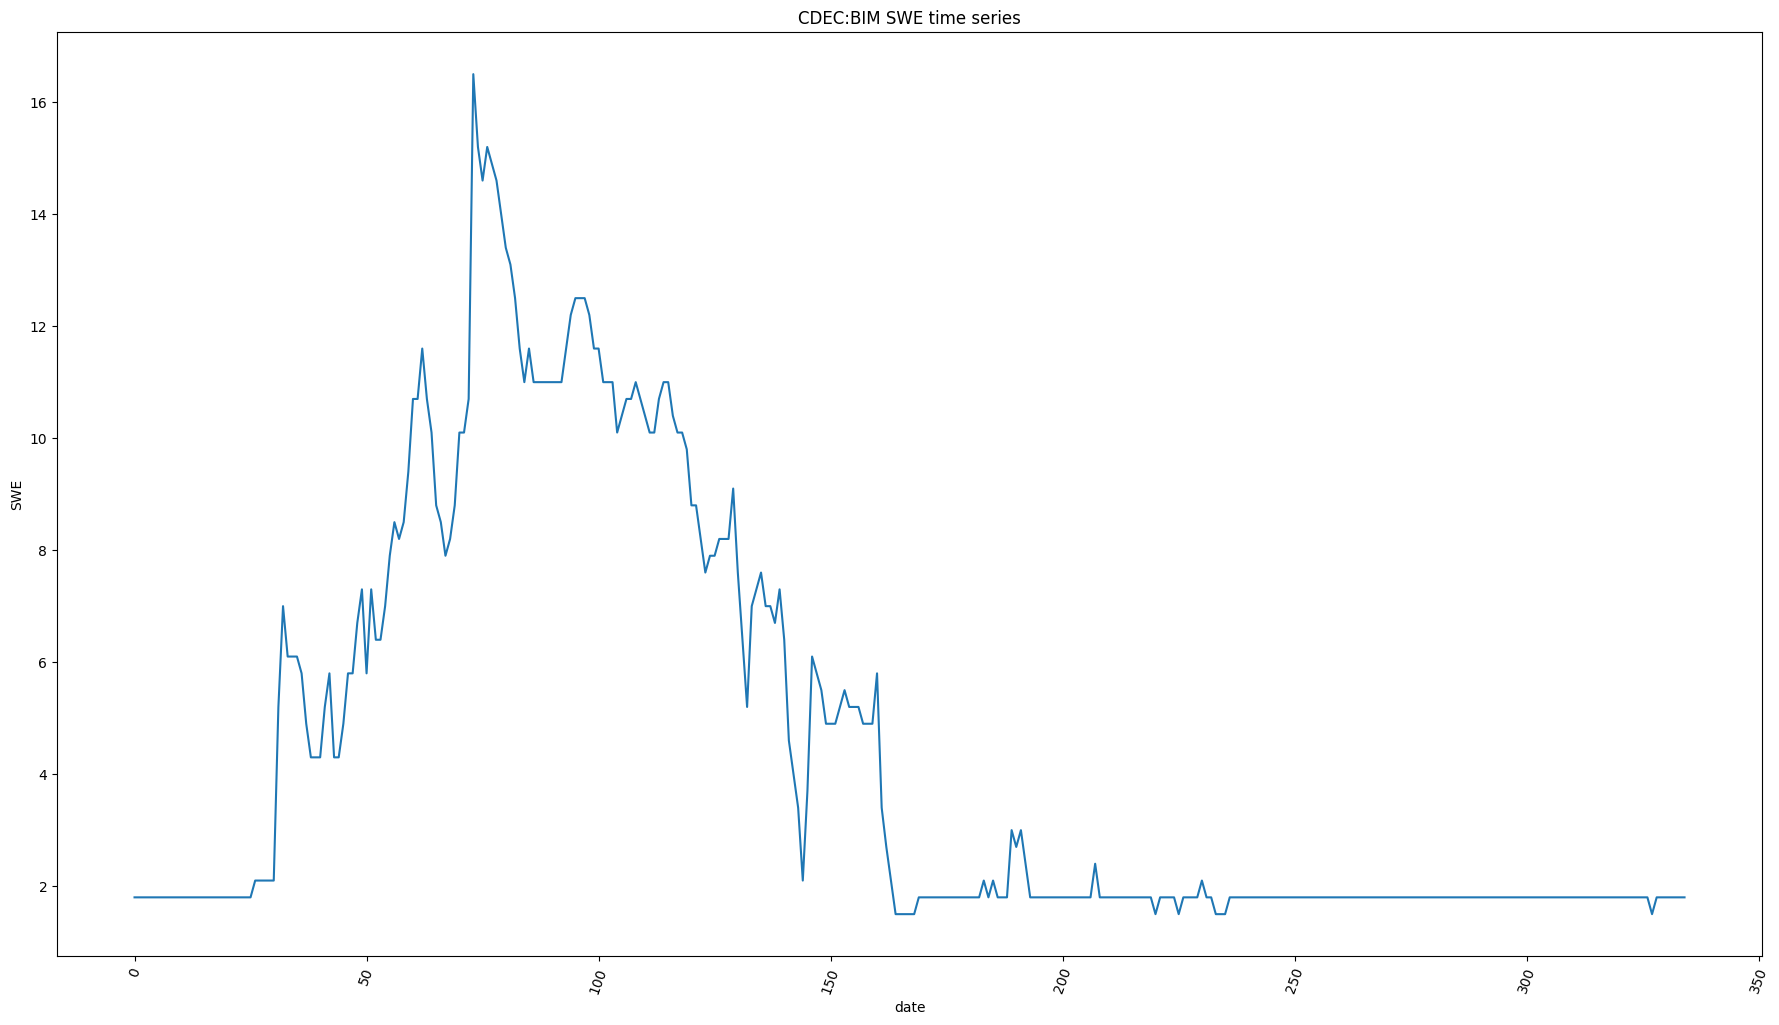

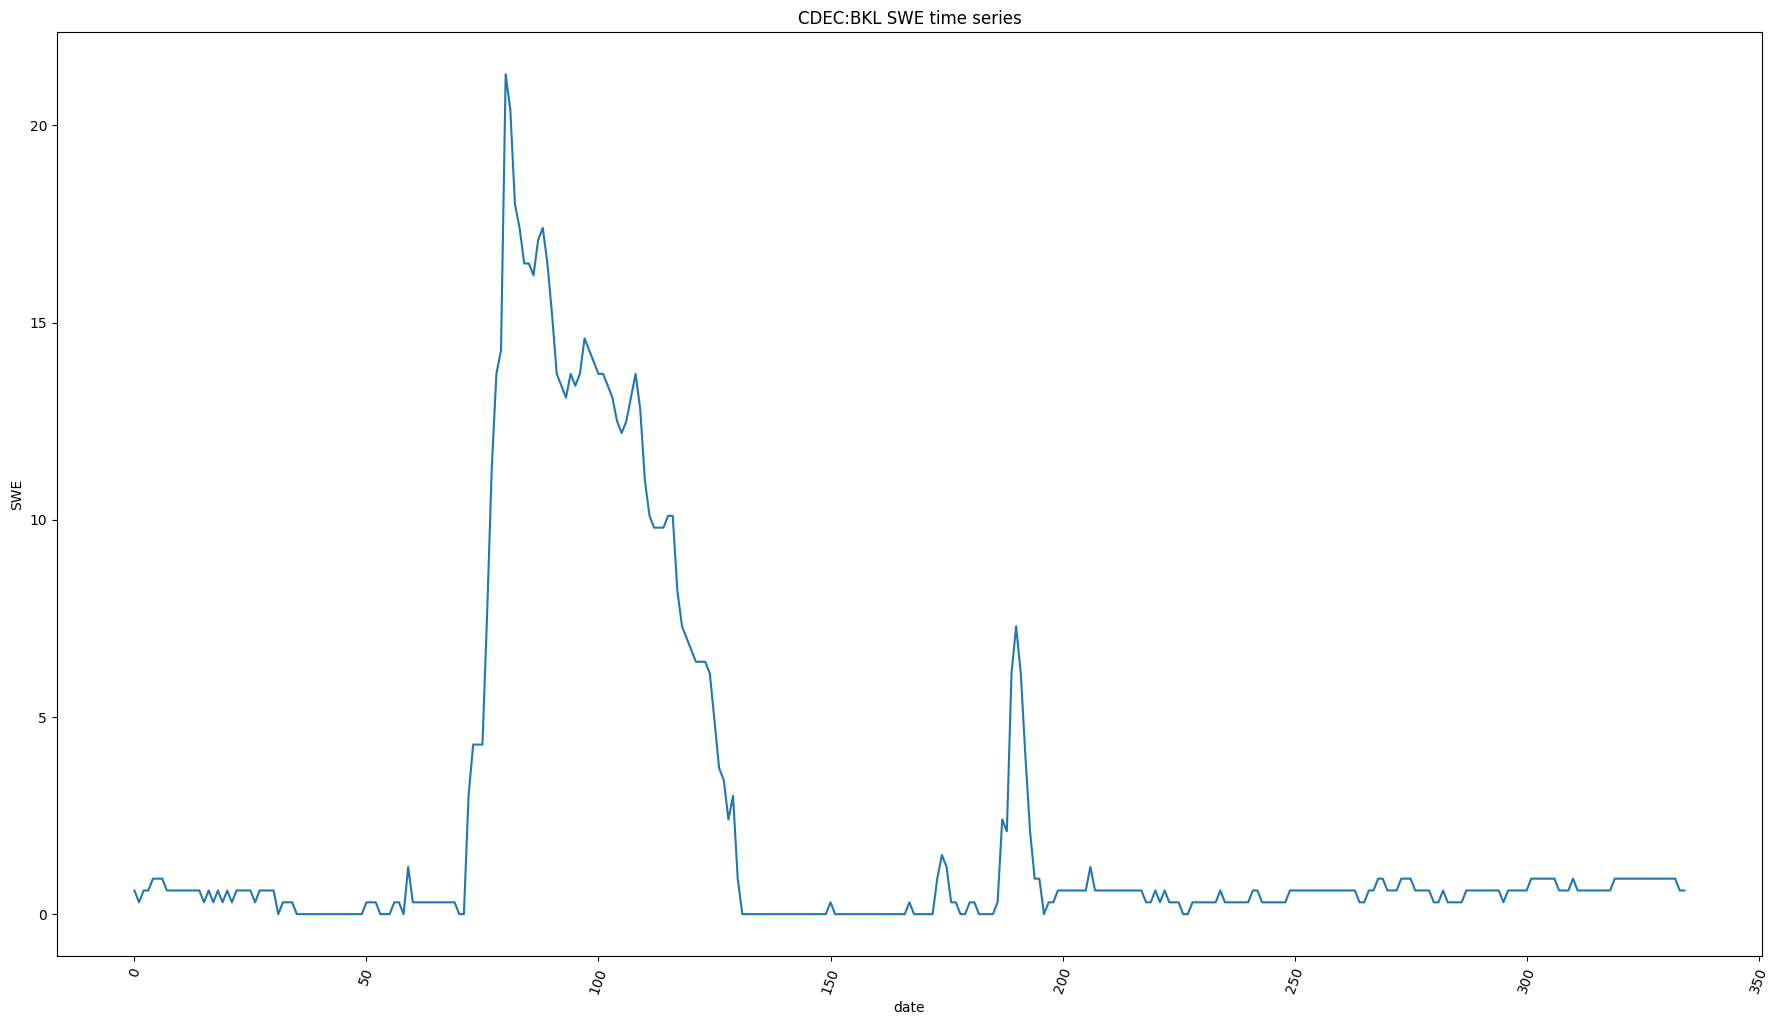

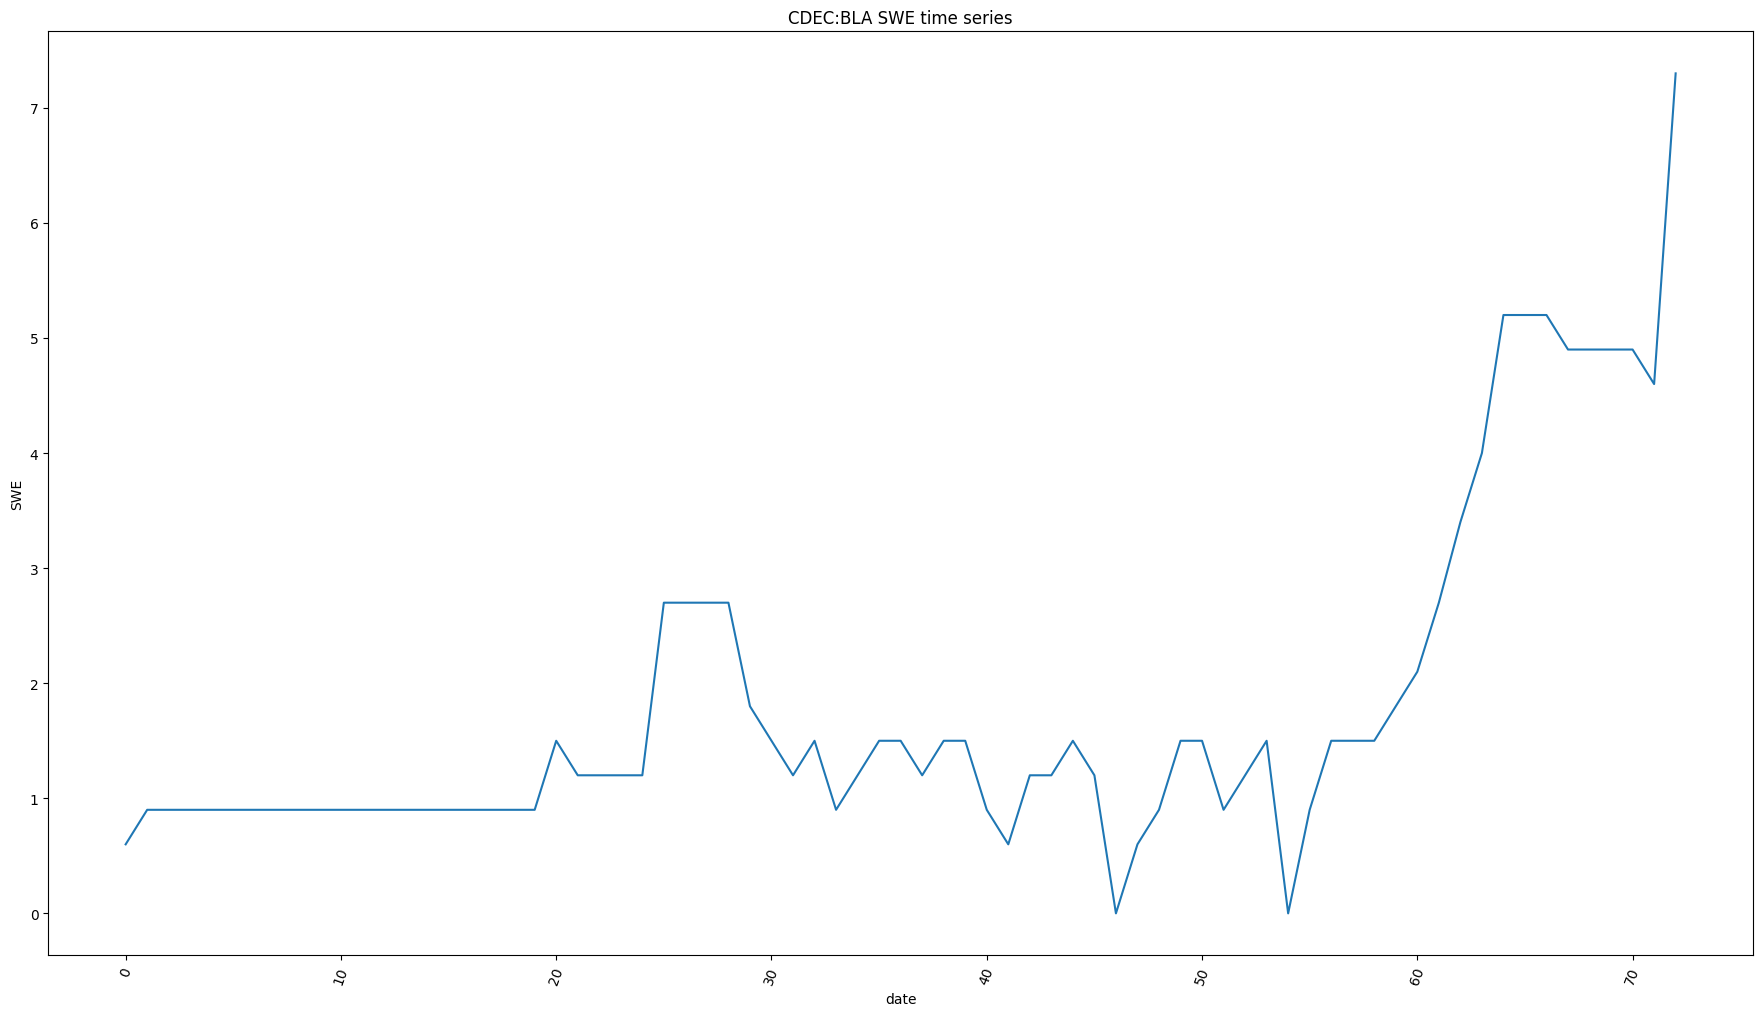

In [2]:


# make a unit hydrograph ish meetric for each site

#load data
DFpath = f'{HOME}/SWEMLv2.0/data/SNOTEL_Data'
snotel =  pd.read_parquet(os.path.join(DFpath, 'seasonal_snotel.parquet'))

#find location average peak swe and divide dataframe by this number
snotel_path = f"{HOME}/SWEMLv2.0/data/SNOTEL_Data"
year_df = pd.read_parquet(f"{snotel_path}/2015_ground_measures_dp.parquet")

year_df = year_df.replace({-9999.0: np.nan})
year_df.head(5)

cols = year_df.columns
year_df[cols[0]] = pd.Series(year_df[cols[0]].values).interpolate(method='nearest').values

import matplotlib.pyplot as plt
import numpy as np

cols = year_df.columns
year_df.reset_index(inplace=True)

for s in np.arange(0,10,1):

       site = cols[s]

       fig, ax = plt.subplots(figsize=(22, 12))
       ax.plot(year_df.index, year_df[site])

       ax.set(xlabel='date', ylabel='SWE',
              title=f'{site} SWE time series')
       #ax.grid()
       plt.xticks(rotation=70)
       #fig.savefig("test.png")
       plt.show()

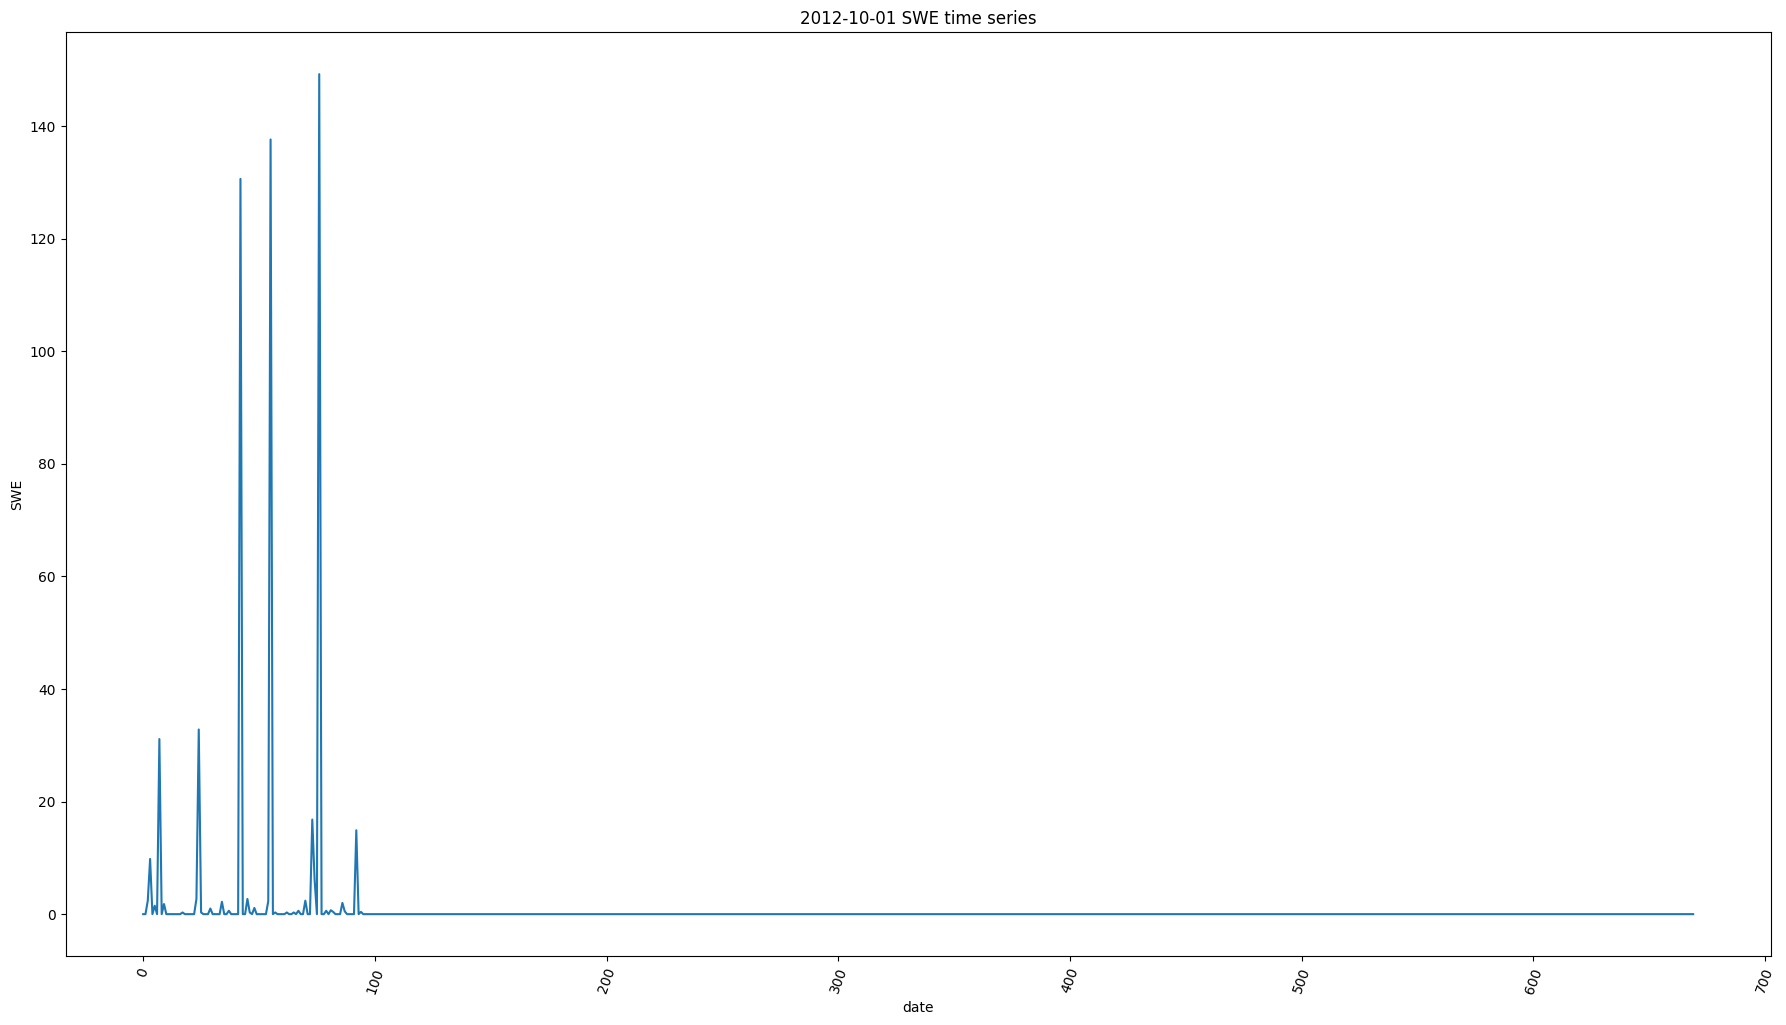

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np

snotel_path = f"{HOME}/SWEMLv2.0/data/SNOTEL_Data"
year_df = pd.read_parquet(f"{snotel_path}/ground_measures_dp.parquet")

year_df = year_df.replace({-9999.0: np.nan})
year_df.head(5)


site = cols[0]

fig, ax = plt.subplots(figsize=(22, 12))
ax.plot(snotel.index, snotel[site])

ax.set(xlabel='date', ylabel='SWE',
       title=f'{site} SWE time series')
#ax.grid()
plt.xticks(rotation=70)
#fig.savefig("test.png")
plt.show()

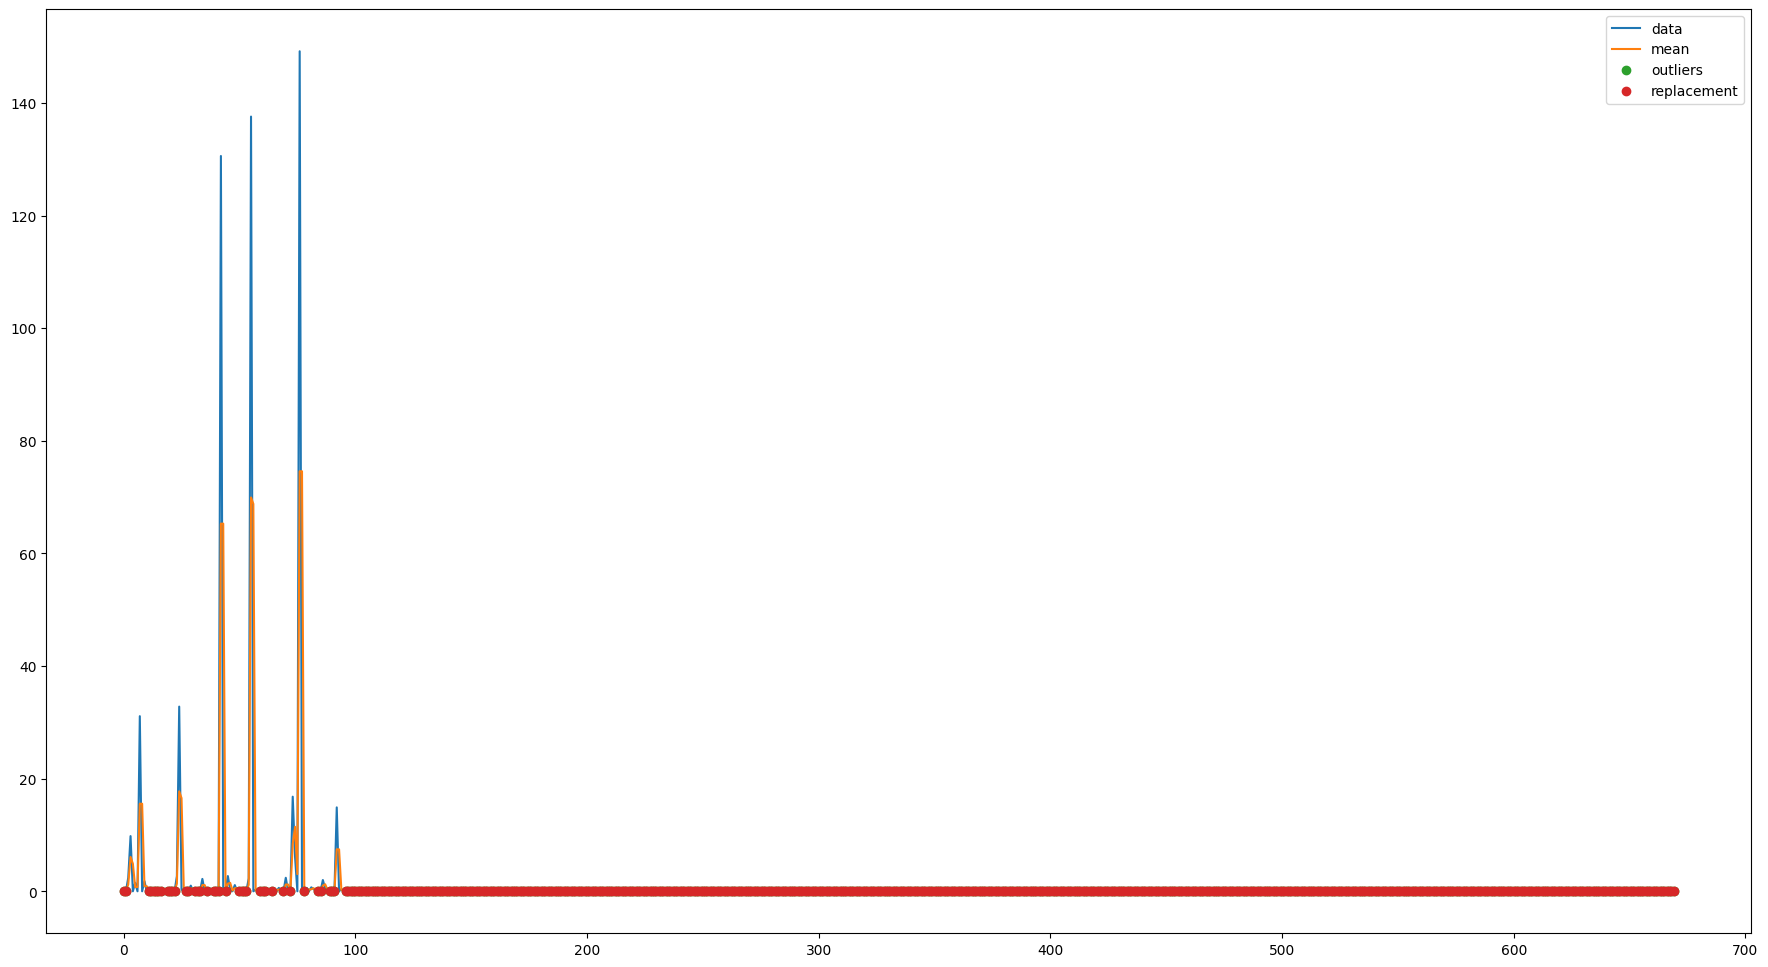

In [5]:
def zscore(s, window, thresh=2, return_all=False):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=0)
    z = s.sub(avg).div(std)   
    m = z.between(-thresh, thresh)
    
    if return_all:
        return z, avg, std, m
    return s.where(m, avg)


N = 1000
np.random.seed(1)
#df = pd.DataFrame({'MW': np.sin(np.linspace(0, 10, num=N))+np.random.normal(scale=0.6, size=N)})

df =pd.DataFrame(snotel[cols[0]])

z, avg, std, m = zscore(df[cols[0]], window=2, return_all=True)

ax = plt.subplots(figsize=(22, 12))

df[cols[0]].plot(label='data')
avg.plot(label='mean')
df.loc[~m, cols[0]].plot(label='outliers', marker='o', ls='')
avg[~m].plot(label='replacement', marker='o', ls='')
plt.legend()

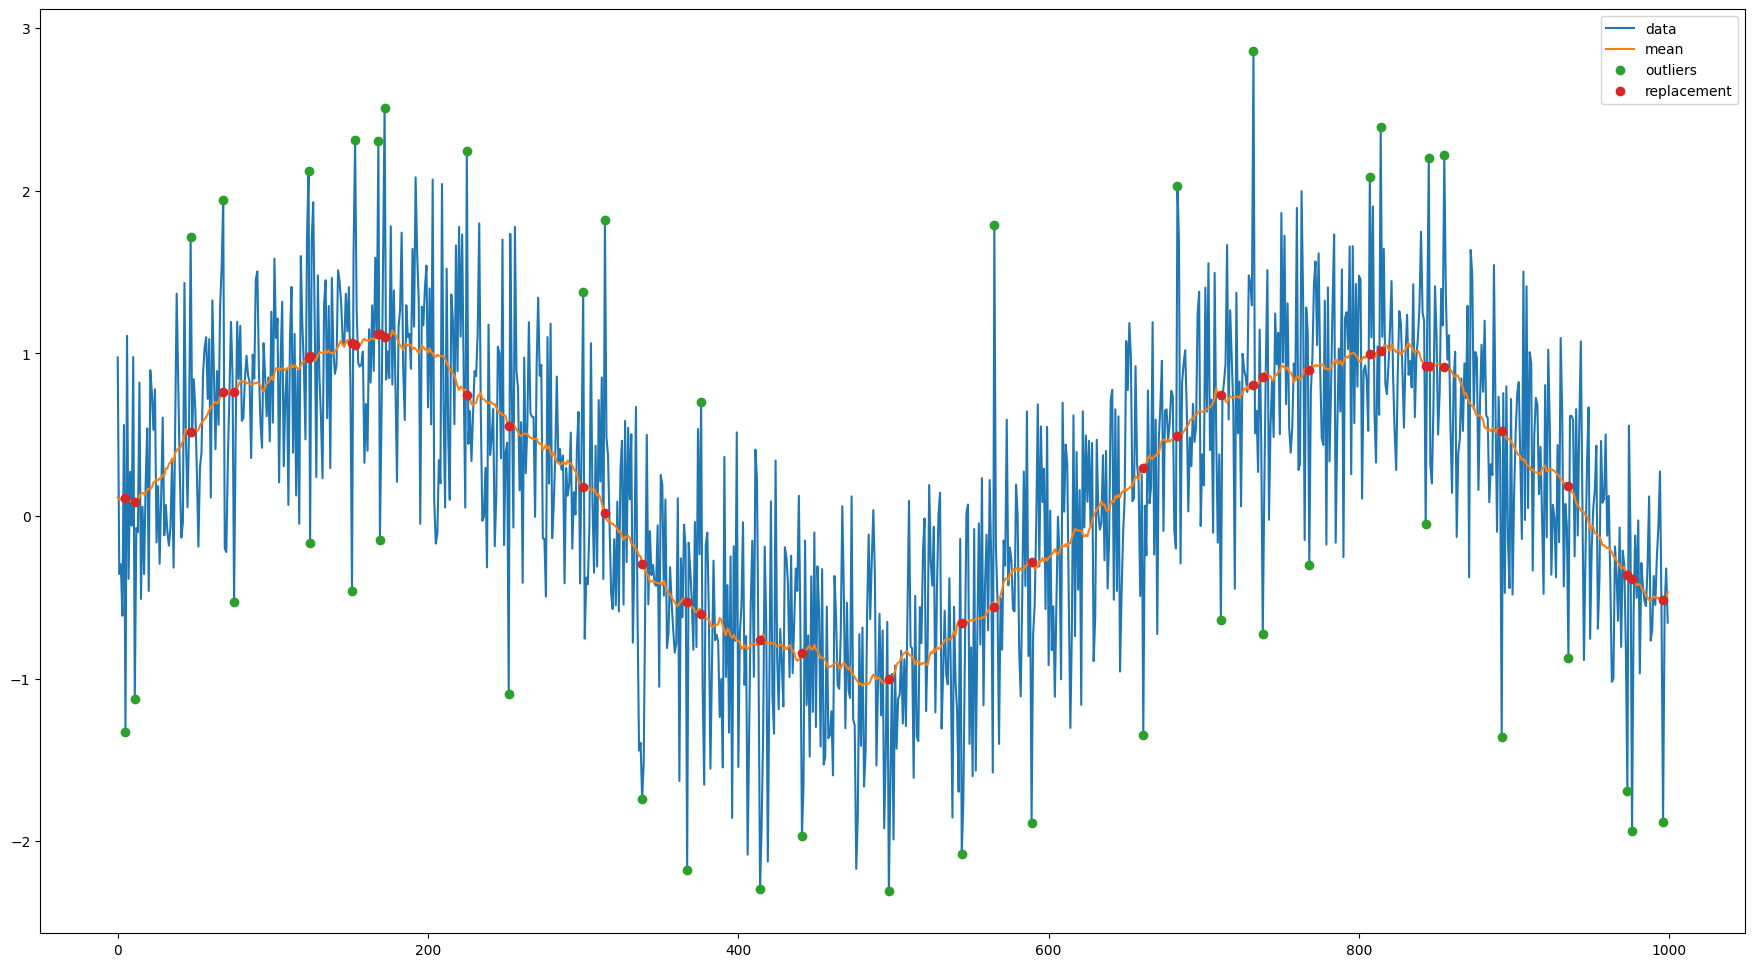

In [6]:
N = 1000
np.random.seed(1)
df = pd.DataFrame({'MW': np.sin(np.linspace(0, 10, num=N))+np.random.normal(scale=0.6, size=N)})

z, avg, std, m = zscore(df['MW'], window=50, return_all=True)

ax = plt.subplots(figsize=(22, 12))

df['MW'].plot(label='data')
avg.plot(label='mean')
df.loc[~m, 'MW'].plot(label='outliers', marker='o', ls='')
avg[~m].plot(label='replacement', marker='o', ls='')
plt.legend()